In [1]:
#Importing The Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_squared_error


In [2]:
import seaborn as sns

In [3]:
#Loading The Train data File
data=pd.read_csv("C:/Users/acer/Desktop/Assignment-1/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePriceCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,Medium
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Low
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,Medium
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Low
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,Medium


In [4]:
#Loading The Test data File
test_data=pd.read_csv("C:/Users/acer/Desktop/Assignment-1/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [6]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Now Treating the Null Values

In [9]:
c=1 
for i in data.columns:
    if (data[i].isnull().sum()) > 0:
        print(i , (data[i].isnull().sum()))
        c+=1


LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [10]:
c=1 
for i in test_data.columns:
    if (test_data[i].isnull().sum()) > 0:
        print(i , (test_data[i].isnull().sum()))
        c+=1


MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


# Treating the Null Values in Numerical Data 

# In case of Train Data

#### 1.  LotFrontage

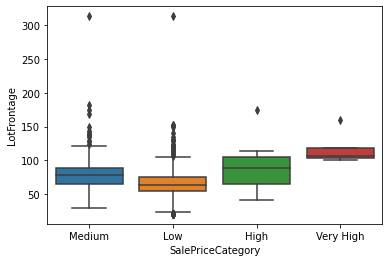

In [11]:
sns.boxplot(data['SalePriceCategory'] , data['LotFrontage'])

In [12]:
def impute_Lotfrontage(x , y):
    if str(x) == 'nan':
        if y == 'Medium':
            return 70
        elif y == 'Low':
            return 60
        elif y == 'High':
            return 90
        else:
            return 100
    return x


In [13]:
z=[]
for x , y in  zip(list(data['LotFrontage']) , list(data['SalePriceCategory'])):
    z.append(impute_Lotfrontage(x , y))


In [14]:
data['LotFrontage'] = z

In [15]:

data['LotFrontage'].isnull().sum()

0

### For Test Data

In [16]:
test_data['LotFrontage'].isnull().sum()

227

In [17]:
# Since there are some null values so replacing all the null values of test data with meadian of train data
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(data['LotFrontage'].median())

#### 2.MasVnrArea

## For Train Data

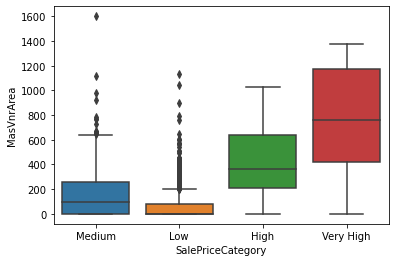

In [18]:
sns.boxplot(data['SalePriceCategory'] , data['MasVnrArea'])

In [19]:
def impute_MasVnrArea(x , y):
    if str(x) == 'nan':
        if y == 'Medium':
            return 100
        elif y == 'Low':
            return 30
        elif y == 'High':
            return 400
        else:
            return 800
    return x

z=[]
for x , y in  zip(list(data['MasVnrArea']) , list(data['SalePriceCategory'])):
    z.append(impute_MasVnrArea(x , y))

In [20]:
data['MasVnrArea'] = z
data['MasVnrArea'].isnull().sum()

0

## For Test Data

In [21]:
test_data['MasVnrArea'].isnull().sum()

15

In [22]:
# Since there are some null values so replacing all the null values of test data with meadian of train data
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(data['MasVnrArea'].median())

#### 3.GarageYrBlt

## For Train Data

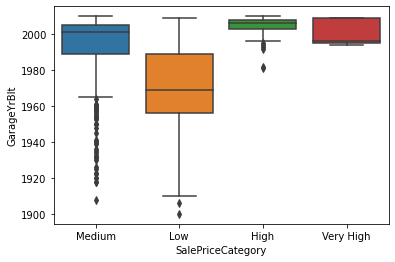

In [23]:
sns.boxplot(data['SalePriceCategory'] , data['GarageYrBlt'])

In [24]:
def impute_GarageYrBlt(x , y):
    if str(x) == 'nan':
        if y == 'Medium':
            return 2000
        elif y == 'Low':
            return 1970
        elif y == 'High':
            return 2010
        else:
            return 1995
    return x

z=[]
for x , y in  zip(list(data['GarageYrBlt']) , list(data['SalePriceCategory'])):
    z.append(impute_GarageYrBlt(x , y))

In [25]:
data['GarageYrBlt'] = z
data['GarageYrBlt'].isnull().sum()

0

## For Test Data

In [26]:
test_data['GarageYrBlt'].isnull().sum()

78

In [27]:
# Since there are some null values so replacing all the null values of test data with meadian of train data
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

# Now all the numerical values are non null in case of train data so replacing null  values in Test Data

#### 4.BsmtFinSF1 

In [28]:
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].median())

#### 5.BsmtFinSF2

In [29]:
test_data['BsmtFinSF2'] = test_data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].median())

#### 6.BsmtUnfSF 

In [30]:
test_data['BsmtUnfSF'] = test_data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].median())

#### 7.TotalBsmtSF 

In [31]:
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].median())

#### 8.BsmtFullBath 

In [32]:
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].fillna(data['BsmtFullBath'].median())

#### 9.BsmtHalfBath 

In [33]:
test_data['BsmtHalfBath'] = test_data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].median())

#### 10.GarageYrBlt 

In [34]:
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

#### 10.GarageCars 

In [35]:
test_data['GarageCars'] = test_data['GarageCars'].fillna(data['GarageCars'].median())

#### 11.GarageArea 

In [36]:
test_data['GarageArea'] = test_data['GarageArea'].fillna(data['GarageArea'].median())

#### Checking that TEST and TRAIN data doesnt consists of NULL values. 

In [37]:

c=1 
for i in data.columns:
    if (data[i].isnull().sum()) > 0:
        print(i , (data[i].isnull().sum()))
        c+=1


Alley 1369
MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [38]:
c=1 
for i in test_data.columns:
    if (test_data[i].isnull().sum()) > 0:
        print(i , (test_data[i].isnull().sum()))
        c+=1


MSZoning 4
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinType2 42
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageFinish 78
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


# Deleting the columns which have very large no. of Null values

In [39]:
data.drop(['Alley' , 'FireplaceQu' , 'PoolQC'  , 'Fence' , 'MiscFeature'] , axis = 1 , inplace  = True)

In [40]:
test_data.drop(['Alley' , 'FireplaceQu' , 'PoolQC'  , 'Fence' , 'MiscFeature'] , axis = 1 , inplace  = True)

In [41]:
# this code will treat Null vaalues in categorical data as a different category
data.fillna('nan' , inplace = True)
test_data.fillna('nan' , inplace = True)

In [42]:
data.shape

(1460, 76)

In [43]:
test_data.shape

(1459, 75)

In [44]:
X = data.drop(['SalePriceCategory'] , axis = 1)
y = data['SalePriceCategory']

In [48]:
# As the Train and Test Data are of same shape, now we will concatinate both the data
train_df = pd.concat([X, test_data] , axis = 0)

In [49]:
#Creating the Dummy Columns
dumm = pd.get_dummies(train_df.select_dtypes(include = 'object') , drop_first = True)

In [50]:
# Now concatinating it to data
df = pd.concat([train_df , dumm] , axis = 1)

In [51]:
# Splitting back the Train and Test Data
train_df = df.iloc[0:1460 , : ]
test_df = df.iloc[1460: , :]

In [52]:
test_df.shape

(1459, 289)

### Now dropping the Column as we have dummies now in the DataFrame

In [59]:
train_df = train_df.drop(train_df.select_dtypes(include = 'object').columns , axis = 1)


In [60]:
test_df = test_df.drop(test_df.select_dtypes(include = 'object').columns , axis = 1)

In [61]:
train_df.shape

(1460, 251)

In [62]:
test_df.shape

(1459, 251)

### Now the data has been Preprocessed.Now we will proceed to splitting of data.


# Data splitting

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.25, random_state=42)

# MinMaxScaler

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
mms = MinMaxScaler()

In [67]:
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

## Fitting a Model

In [68]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500)

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [70]:
pred=rfc.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,accuracy_score

In [72]:
print(accuracy_score(pred,y_test))

0.9095890410958904


## As the Accuracy is high so no need of HyperParameter Tuning

In [74]:
y.value_counts()


Low          957
Medium       461
High          37
Very High      5
Name: SalePriceCategory, dtype: int64

#### Data Is Highly Imbalanced

 Future Scope '' DATA CAN BE OVERSAMPLED OR UNDERSAMPLED OR CATEGORY LIKE VERY HIGH CAN BE MERGED WITH HIGH FOR BETTER ACCURACY"

In [75]:
# predicting Sale Price Category for test data

In [76]:
test_pred = rfc.predict(test_df)

In [77]:
test_data['SalePriceCategory'] = test_pred

In [231]:
test_data.to_csv('Predicted_data.csv' , index = False)